### MA4402 Simulación Estocástica: Teoría y Laboratorio
# Laboratorio 2: Reducción de varianza y cadenas de Markov
### Grupo 2<br>Integrantes: Nicolás Cornejo, Martin Gilabert, Miguel Videla, Pablo Zúñiga


In [ ]:
import os
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.ticker import MaxNLocator
from tabulate import tabulate

##Problema 1
En este problema queremos estimar la expresión
$$\alpha_b = \mathbb{E}(e^{bZ}1_{Z > 0})$$
(donde $b \in \mathbb{R}$ y $Z$ es una variable normal estándar) a través de un método de MonteCarlo con baja varianza. En lo que sigue $X$ denotará la variable $e^{bZ}1_{Z>0} = f(Z)$.

1. Sea $\mu$ la ley de una normal estándar y $\nu$ la ley de una normal de media $b$ y varianza 1. Estas medidas son equivalentes, y podemos escribir $$ \text{d}\nu(z) = \frac{e^{-(z-b)^2/2}}{\sqrt{2\pi}} \text{d} z = e^{-b^2/2}e^{bz} \text{d}\mu(z)$$
de modo que si $W$ tiene ley $\nu$, $\alpha_b$ se puede calcular como
$$\alpha_b = \int_\mathbb{R} f(z) \text{d}\mu(z) = \int_\mathbb{R} \frac{f(z)}{e^{-b^2/2}e^{bz}}\text{d} \nu(z) = \int_\mathbb{R} 1_{z > 0} e^{b^2/2}\text{d}\nu(z).$$
La función $\texttt{mPref(N,z,b)}$ recibe un natural $N$ y un vector $z \in \mathbb{R}^N$ sampleado de una normal estándar, y devuelve una aproximación de $\alpha_b$ usando la igualdad anterior y un método MonteCarlo básico. Es fácil simular $W$ a partir de una variable normal estándar $Z$ como $W = Z + b$, y el método usa esto para obtener realizaciones de $W$.

In [ ]:
def mPref(N,z,b):
  w = z + b*np.ones(N)
  r = np.where(w>0, np.exp(b**2/2), 0)
  return np.mean(r)

#u = norm.rvs(size=10**7)
#print(mPref(10**7, u, 2))

7.2294524871937496


2. La función $\texttt{varCont}(N,z,b)$ recibe un natural $N$ y un vector $z \in \mathbb{R}^N$ sampleado de una normal estándar, y devuelve una estimación de $\alpha_b$ a partir del método de variable de control. El método usa la variable $W = e^{bZ}$ (cuya esperanza es $e^{b^2/2}$) para estimar $\alpha_b$ por la expresión
$$(1) \qquad \frac{1}{N} \left( \sum_{i = 1}^N X_i + \hat{c}W_i \right)- \hat{c} e^{b^2/2} $$
donde $$\hat{c} = -\frac{ \sum_{i = 1}^q (e^{bz_i}1_{z_i>0} - \frac{1}{q}\sum_{k = 1}^qe^{bz_k}1_{z_k>0} )(e^{bz_i} - e^{b^2/2})}{\sum_{i = 1}^q (e^{bz_i} - e^{b^2/2})^2}$$
es una aproximación (para $q$ pequeño) del minimizador de la expresión (1). La expresión exacta de $c$ es $-\text{Cov}(X,W)/\text{Var}(W)$, es estimada por la función $\texttt{estC}$ con $q = 10^3$, y resulta ser aproximadamente $1.0007$.

In [ ]:
def estC(q, z, b):
  W = np.exp(b*z)
  Wmean = np.exp(b**2/2)
  X = np.where(z > 0, W, 0)
  Xmean = np.mean(X[:q], dtype=np.float64)
  c1 = 0
  c2 = 0
  for i in range(q):
    c1 += (X[i] - Xmean)*(W[i] - Wmean)/(q-1)
    c2 += (W[i] - Wmean)**2/(q-1)
  c = c1/c2
  return c

#for i in range(2,5):
#  print(estC(10**i, u, 2))

#c resulta ser 1.0007 aprox

def varCont(N,z,b):
  W = np.exp(b*z)
  Wmean = np.exp(b**2/2)
  X = np.where(z > 0, W, 0)

  c = 1.0007
  R = X - c*W
  return np.mean(R, dtype=np.float64) + c*Wmean;

def monteCarlo(N, z, b):
  W = np.exp(b*z)
  X = np.where(z > 0, W, 0)
  return np.mean(X, dtype=np.float64)

#u = norm.rvs(size=10**7)
#print(varCont(10**7, u, 2))
#print(monteCarlo(10**7, u, 2))

0.9701615044445211
1.0009546931874305
1.0002672173041465
7.221039408969816
7.191458741668884


3. Notemos que si $Z$ es una variable normal estándar entonces $-Z$ también distribuye como una normal estándar. Esto permite usar el método de variables antitéticas para mejorar el método anterior: la función $\texttt{antiT}(N,z,b)$ recibe un natural $N \in \mathbb{N}$, un vector aleatorio $z \in \mathbb{R}^N$ sampleado de una normal estándar y $b \in \mathbb{R}$, y devuelve una estimación de $\alpha_b$ por
$$ \frac{1}{2}(l(z) + l(-z))$$
donde $l(z)$ es la función asociada al método $\texttt{varCont}$ del ítem anterior.

In [ ]:
'''def antiT(N, z, b):
  W = np.exp(b*z)
  X = np.where(z > 0, W, 0)
  Xmean = np.mean(X)

  zz = -z
  WW = np.exp(b*zz)
  XX = np.where(zz > 0, WW, 0)
  XXmean = np.mean(XX)
  return np.mean([XXmean, Xmean]);
'''

def antiT(N, z, b):
  f1 = varCont(N, z, b)
  f2 = varCont(N, -z, b)
  return np.mean([f1, f2])
  
#u = norm.rvs(size=10**7)
#print(antiT(10**7, u, 2))

7.220939018077456


4. La figura entregada por el código que sigue muestra la desviación estándar empírica de las variables asociadas a cada método para muestras de tamaño $N \in \{300, 10^3, 5\times 10^3, 10^4, 5\times 10^4, 10^5\}$, y desviación estándar empírica en cada caso se calcula según el estimador usual de la varianza tomando $10^3$ estimaciones entregadas por cada método (con muestras distintas). Los métodos están indexados por el orden en el que se introducen en esta pregunta (y el método 4 es la aproximación de MonteCarlo normal). Se observa que ésta tiene globalmente la mayor desviación estándar, mientras que los métodos de variables antitéticas y de control tienen la menor desviación.

  La tabla que sigue muestra también una estimación de esta desviación estándar para cada método con muestras de tamaño $N = 10^2$, calculada tomando $10^2$ resultados de cada método. Se confirma la observación anterior: los métodos 1, 2 y 3 tienen una desviación estándar al menos dos órdenes de magnitud más pequeñas que el MonteCarlo usual. En lo que sigue escribiremos $\sigma_i$ como la desviación estándar de la variable asociado al método $i$.

  $$\begin{array}{c|c}
\text{Método} & \text{Desviación estándar}\\ \hline
1 & 0.131 \\
2 & 0.025\\
3 & 0.014\\
4 & 5.375\\
  \end{array}
  $$


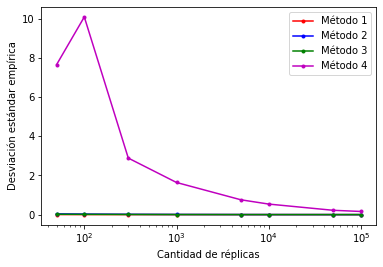

In [ ]:
N = 10**3

simulaciones = np.zeros((4,N))
de = np.zeros((4,8))

enes = [50, 100, 300, 1000, 5000, 10**4, 5*10**4, 10**5]

for i in enes:
    simulaciones = np.zeros((4,N))
    for j in range(N):
      z = norm.rvs(size=i)
      simulaciones[:,j] = [mPref(i, z, 2), varCont(i,z,2), antiT(i,z,2), monteCarlo(i,z,2)]
    de[:,enes.index(i)] = [np.std(simulaciones[0,:]), np.std(simulaciones[1,:]), np.std(simulaciones[2,:]), np.std(simulaciones[3,:])]


fig, ax = plt.subplots()
line1, = ax.plot(enes, de[0,:],'.-r', label= "Método 1")
line2, = ax.plot(enes, de[1,:],'.-b', label= "Método 2" )
line3, = ax.plot(enes, de[2,:],'.-g', label= "Método 3" )
line4, = ax.plot(enes, de[3,:],'.-m', label= "Método 4" )
ax.set_xscale('log')
ax.set(xlabel='Cantidad de réplicas', ylabel='Desviación estándar empírica')
ax.legend()

plt.show()

In [ ]:
N = 10**2
simulaciones = np.zeros((4,10**2))

for i in range(10**2):
  z = norm.rvs(size=N)
  simulaciones[:,i] = [mPref(N, z, 2), varCont(N,z,2), antiT(N,z,2), monteCarlo(N,z,2)]

de = [np.std(simulaciones[0,:]), np.std(simulaciones[1,:]), np.std(simulaciones[2,:]), np.std(simulaciones[3,:])]
#los valores 'nominales' que usaremos en la próxima pregunta son de_1 = 0.13, de_2 = 0.025, de_3 = 0.014 y de_4 = 5.375

print( 'Desviación estándar:')
print('Método 1:' + str(de[0]))
print('Método 2:' + str(de[1]))
print('Método 3:' + str(de[2]))
print('Método 4:' + str(de[3]))


Desviación estándar:
Método 1:0.11440158453642596
Método 2:0.02831735468150789
Método 3:0.012258760247113268
Método 4:4.71778665628819


5. Para $\varepsilon = 0.02$ y $\alpha = 0.05$ (y $z_x$ la función de distribución inversa de la normal), el código que sigue calcula los $N_{\text{max}}^{i}$ para $i \in [4]$ tales que $$N_{\text{max}}^i \geq \frac{\sigma_i^2 z_{\alpha/2}^2}{\varepsilon^2},$$ es decir los primeros naturales $N_\text{max}^i$ tales que la aproximación entregada por el TCL asegura que el método $i$ tiene un error menor a $\varepsilon$ con probabilidad $1- \alpha$.

  La desviación estándar de los primeros dos métodos es tan baja que obtenemos $N_\text{max}^{1,2} \leq 10$, un resultado que de todas maneras no tiene utilidad práctica pues la aproximación que entrega el TCL es asintótica. Si en el ítem anterior hubiésemos estimado la desviación estándar con un $N$ mayor y aún más muestras de cada método  (por ejemplo, números del orden de $10^4$) obtendríamos $N_{\text{max}}^i = 1$ para cada $i$.

  $$\begin{array}{c|c}
\text{Método} & N_{\text{max}}^i\\ \hline
1 & 163 \\
2 & 7\\
3 & 2\\
4 & 277456\\
  \end{array}
  $$

In [ ]:
alpha = 0.05
epsilon = 0.02
de = [0.13, 0.025, 0.014, 5.375]
Nes = np.zeros(4)
for i in range(4):
  Nes[i] = np.ceil((de[i]*norm.ppf(1 - alpha/2)/epsilon)**2)


print( 'N_max^i:')
print('Método 1:' + str(Nes[0]))
print('Método 2:' + str(Nes[1]))
print('Método 3:' + str(Nes[2]))
print('Método 4:' + str(Nes[3]))

N_max^i:
Método 1:163.0
Método 2:7.0
Método 3:2.0
Método 4:277456.0


6. El entero $N_\text{max}$ de la parte anterior es 163. La figura siguiente muestra los valores obtenidos por cada método para tamaños de muestra $N \leq 2N_\text{max}$. La sección achurada en torno a la recta $y = \alpha_2$ corresponde a los valores a distancia $\leq \varepsilon$ de $\alpha_2$.

  Los métodos 2 y 3 alcanzan la precisión deseada para este rango de valores, pero el método 1 resulta problemático. Parece haber una especie de regularidad en sus resultados que no logramos explicar, y por otro lado es extraño que justamente este método falle con este $N_{\text{max}} = N_{\text{max}}^1$.

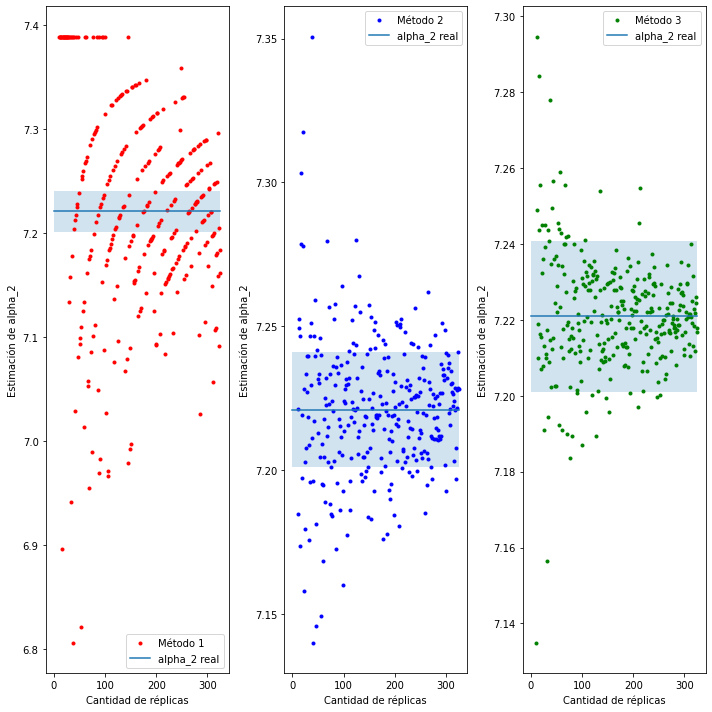

In [ ]:
N = 2*163
simulaciones = np.zeros((4,N - 10))

for i in range(10, N):
  z = norm.rvs(size=i)
  simulaciones[:,i - 10] = [mPref(i,z,2), varCont(i,z,2), antiT(i,z,2), monteCarlo(i,z,2)]

alphab = 7.2209

fig, ax = plt.subplots(1,3, figsize = (10,10))
ax[0].plot(range(10, N), simulaciones[0,:],'.r', label= "Método 1")
ax[1].plot(range(10, N), simulaciones[1,:],'.b', label= "Método 2" )
ax[2].plot(range(10, N), simulaciones[2,:],'.g', label= "Método 3" )
ax[0].plot(range(N), np.full(N, alphab), label='alpha_2 real')
ax[1].plot(range(N), np.full(N, alphab), label='alpha_2 real')
ax[2].plot(range(N), np.full(N, alphab), label='alpha_2 real')
ax[0].fill_between(range(N), alphab - 0.02, alphab + 0.02, alpha = 0.2)
ax[1].fill_between(range(N), alphab - 0.02, alphab + 0.02, alpha = 0.2)
ax[2].fill_between(range(N), alphab - 0.02, alphab + 0.02, alpha = 0.2)

ax[0].set(xlabel='Cantidad de réplicas', ylabel= 'Estimación de alpha_2')
ax[1].set(xlabel='Cantidad de réplicas', ylabel= 'Estimación de alpha_2')
ax[2].set(xlabel='Cantidad de réplicas', ylabel= 'Estimación de alpha_2')

ax[0].legend()
ax[1].legend()
ax[2].legend()
fig.tight_layout()

plt.show()


A continuación también entregamos el gráfico de los resultados del primer método para un número de réplicas en el intervalo $[9000, 9300]$. El gráfico permite asegurar que la regularidad en los resultados de este método vista en la figura anterior no permanece al aumentar considerablemente la cantidad de réplicas y que la precisión deseada sí se alcanza cuando se recalcula $N_{\text{max}}^1$ sin considerar el efecto de la desviación estándar sorprendentemente pequeña que obtuvimos en la parte 4., es decir si tomamos $N_{\text{max}}^1 = z_{\alpha/2}^2/\varepsilon^2 \approx 9600$.

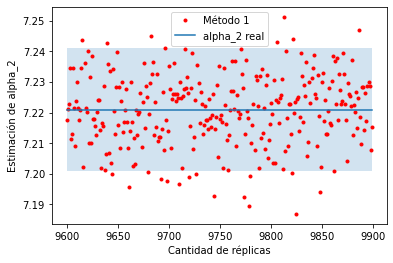

In [100]:
pref = np.zeros(300)
for i in range(9600, 9900):
  z = norm.rvs(size=i)
  pref[i - 9600] = mPref(i,z,2)

alphab = 7.2209

fig, ax = plt.subplots()
ax.plot(range(9600, 9900), pref,'.r', label= "Método 1")
ax.fill_between(range(9600, 9900), alphab - 0.02, alphab + 0.02, alpha = 0.2)
ax.plot(range(9600, 9900), np.full(300, alphab), label='alpha_2 real')
ax.set(xlabel='Cantidad de réplicas', ylabel= 'Estimación de alpha_2')
ax.legend()


In [ ]:
np.ceil((norm.ppf(1 - alpha/2)/epsilon)**2)

9604.0

7. El valor exacto de $\alpha_2$ (encontrado por $\texttt{wolframalpha.com}$) es
$$ \frac{1}{\sqrt{2\pi}}\int_0^\infty e^{2x}e^{-x^2/2}\text{d}x = \frac{e^2}{2} (\text{erf}(\sqrt{2}) + 1) \approx 7.22095,$$
y se utilizó en el gráfico de la parte anterior.

  Pese a que no hemos estimado el tiempo de ejecución de cada método, en términos de varianza los métodos de variables antitéticas y de control son claramente superiores al resto según la estimación de la parte 5. y los resultados de la parte anterior. Aunque el tiempo de ejecución del método de MonteCarlo usual fuese dos órdenes de magnitud menor que el de los otros métodos esto no compensaría la diferencia de las varianzas, y el comportamiento problemático del método 1 para un número bajo de réplicas hace preferible los métodos 2 y 3.

  Por otro lado, es bueno verificar que la idea de usar variables antitéticas sí funciona en este contexto (según la tabla del ítem 5 sí hay una disminución la varianza). Pese a que en clase sólo vimos resultados concernientes a funciones monótonas de variables uniformes, éstos sí aplican en esta situación pues una variable normal se puede escribir como $Z = I(U)$ donde $I$ es la función de distribución inversa de la normal y $U$ es uniforme, y además $f$ es monótona.

## Problema 2

### Simulación de cadenas de Markov y flujos Markovianos

### P2.1)

Se observa que $P$ es matriz estocaśtica, luego $\sum_{z=1}^N P_{xz}=1,\forall x \in E$, y además $u\sim U\left([0,1]\right)$, por lo que la función $f(x,u):=\inf\left\{y\in E: \sum_{z=1}^y P_{xz}\geq u\right\}$ resulta equivalente a particionar el intervalo $[0,1]$ en $N$ sub-invervalos de largo $P_{xz},\forall z\in E$, es decir, $[0,1]= \left[0=P_{x0},P_{x1}\right]\dot{\cup} \left(P_{x1},P_{x1}+P_{x2}\right]\dot{\cup} \ldots \dot{\cup} \left(\sum_{z=1}^{N-1} P_{xz},\sum_{z=1}^N P_{xz}=1\right]$, donde la probabilidad de transicionar a un estado $y\in E$ queda determinada por la probabilidad de que la realización de la variable aleatoria uniforme $u$ caiga dentro del subintervalo correspondiente, es decir: 

\begin{equation}
    \mathbb{P}(f(x,u)=y)= \mathbb{P}\left(\inf\left\{y\in E: \sum_{z=1}^y P_{xz}\geq u\right\}=y\right)=\mathbb{P}\left(u\in \left(\sum_{z=1}^{y-1} P_{xz},\sum_{z=1}^y P_{xz}\right]\right)=\frac{\sum_{z=1}^y P_{xz}-\sum_{z=1}^{y-1} P_{xz}}{1-0}=P_{xy},
\end{equation}

y por lo tanto, la matriz formada por todas las transiciones posibles mediante $\mathbb{P}(f(x,u)=y),\forall x,y \in E$ resulta equivalente a la matriz estocástica $P$.

### P2.2)

In [ ]:
def Trans(x, u, P):
    '''Transition function implementation'''
    return (P[x,:].cumsum(axis=1) >= u).argmax(axis=1)
    
def CM(mu, P, n):
    '''Simulation of n-steps of a Markov chain'''
    x = (mu.cumsum(axis=1) >= np.random.uniform()).argmax(axis=1)
    transitions = [x]
    for _ in range(n):
        x = Trans(x, np.random.uniform(), P)
        transitions.append(x)
    return np.array(transitions).T

### P2.3)

In [ ]:
def Flujo(x, n, m, u, P):
    '''Random flux of a Markov chain'''
    transitions = [x]
    for i in range(m - n + 1):
        x = Trans(x, u[i], P)
        transitions.append(x)
    return np.array(transitions).T

### P2.4)

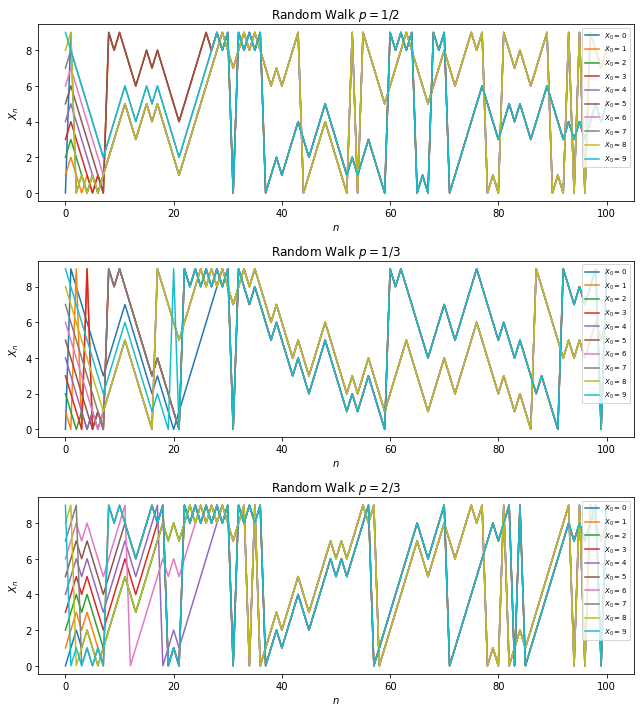

In [ ]:
# Parameters
K = 10
n = 100
# Uniform distributed variables
U = np.random.uniform(size=100)
# Initial states
X = np.arange(K)
# Transition probabilites
p_array = [1/2, 1/3, 2/3]
p_names = ['1/2', '1/3', '2/3']
# Flows computation
flows = []
for p in p_array:
    P = np.diagflat(np.ones(K-1) * p, 1) + np.diagflat(np.ones(K-1) * (1 - p), -1)
    P[0,-1] = 1 - p; P[-1,0] = p
    flows.append(Flujo(X, 1, n, U, P))
# Plots
plt.figure(figsize=(9,10))
for i in range(len(flows)):
    plt.subplot(len(flows), 1, i+1)
    flow = flows[i]
    for j in range(flow.shape[0]):
        plt.plot(range(flow.shape[1]), flow[j], label=r'$X_0={}$'.format(j))
    plt.title(r'Random Walk $p={}$'.format(p_names[i]))
    plt.xlabel(r'$n$')
    plt.ylabel(r'$X_n$')
    plt.legend(prop={'size': 7}, loc='upper right')
plt.tight_layout()
plt.show()

*  Para $p=1/3$ se aprecia que la totalidad de las cadenas simuladas tiende a evolucionar hacia estados inferiores, ya que $2/3=1-p>p=1/3$.

*  Para $p=2/3$ se aprecia que la totalidad de las cadenas simuladas tiende a evolucionar hacia estados superiores, ya que $2/3=p>1-p=1/3$.

*  Para $p=1/2$ no se aprecia ninguna clara tendencia de evolución hacia estados superiores o inferiores, manteniendo transiciones equiprobables hacia estados superiores e inferiores, ya que $1/2=p=1-p$.
*  Todas las cadenas de estado inicial par coalescen a una misma trayectoria (curva verde), mientras que las cadenas de estado inicial impar coalescen a otra trayectoria distitna (curva cyan), lo cual se debe a que las cadenas en dichos estados iniciales se encuentran en un determinado tiempo $n$ a causa de la transición toroidal de estados, evolucionando idénticamente desde esos puntos de encuentro.

### Aplicación a un modelo de colas

### P2.5)

$X_n$: Cantidad de clientes en el instante $n$ \\
$p$: Probabilidad de que llegue un cliente en el instante $n$ \\
$q$: Probabilidad de que un cliente se vaya en el instante $n$ 

Sea $n\in\mathbb{N}$ y sean $Y_n\sim Ber(p)$ y $Z_n\sim Ber(q)$ v.a's independientes, tenemos que en el instante $n$, hay $X_{n-1}$ personas, más las que llegaron, menos las que se fueron (si es que habían), es decir:

$$X_{n}= X_{n-1}+Y_{n}-Z_{n}\cdot \textbf{1}_{X_{n-1}>0} = F(X_{n-1}, Y_{n}, Z_{n})$$


Notemos que $X_{n}$ es irreducible, pues dado un estado $i\in I$, puedo pasar al siguiente si $Y_{n}=1, Z_{n}=0$, es decir:

$$P(X_{n+1}=X_{n}+1)=P(Y_{n}=1,Z_{n}=0)=p(1-q)>0$$

Y puedo retroceder al anterior, si $Y_{n}=0, Z_{n}=1$, es decir:

$$P(X_{n+1}=X_{n}-1)=P(Y_{n}=0,Z_{n}=1)=q(1-p)>0$$

Luego, cada estado se comunica con el siguiente y el anterior, por lo tanto todos los estados se comunican entre sí, es decir, $(X_n)$ es irreducible.

En el caso $p=q$, la cadena tiene la medida invariante:

$$\mu = (1-p,1,1,...) $$

Como la cadena es irreducible, se sigue que esta es la única medida invariante (salvo ponderaciones), pero esta medida no es de probabilidad ni puede normalizarse (pues hay infinitas componentes que valen $1$), por lo tanto en este caso la cadena es recurrente nula.

En el caso $p< q$, tenemos la medida invariante:

$$\mu_0 =\dfrac{q-p}{q}, \qquad \mu_x = \left(\dfrac{p(1-q)}{q(1-p)}\right)^x \cdot \dfrac{q-p}{q(1-q)},\quad x\geq 1$$

Veamos que esta medida es una distribución invariante, para ello basta ver que $\sum\mu_x = 1$, en efecto:

$$\sum_{x\geq 0}\mu_x = \mu_0 + \sum_{x\geq 1}\mu_{x}=\dfrac{q-p}{q}+\dfrac{q-p}{q(1-q)}\sum_{x\geq 1}\left(\dfrac{p(1-q)}{q(1-p)}\right)^x $$

Notemos que esta última es una serie geómetrica, como $0< p< q$, entonces $p/q< 1$ y $(1-q)/(1-p)< 1$, y por lo tanto $\frac{p(1-q)}{q(1-p)}< 1$, por lo que la serie es convergente y su valor es:

$$\sum_{x\geq 1}\left(\dfrac{p(1-q)}{q(1-p)}\right)^x = \left(\dfrac{1}{1-\frac{p(1-q)}{q(1-p)}} - 1 \right)$$

Por lo tanto, al reemplazar en la ecuación anterior, obtenemos:

$$\sum_{x\geq 0}\mu_x = \dfrac{q-p}{q}+\dfrac{q-p}{q(1-q)}\left(\dfrac{1}{1-\frac{p(1-q)}{q(1-p)}} - 1 \right) = 1$$

Es decir, la medida es una distribución invariante y por lo tanto en este caso la cadena es recurrente positiva. Por último, en el caso $p> q$, la cadena diverge c.s. por lo que la cadena es transiente.

Finalmente, como resumen se tiene lo siguiente:

$$p=q: \mbox{Recurrente nulo} $$
$$p< q: \mbox{Recurrente positivo} $$
$$p> q: \mbox{Transiente}$$

### P2.6)

#### Simulación de $(X_n)$ en los casos recurrente nulo, recurrente positivo y transiente

Se escogen los valores representativos de $p$ y $q$ como

- $p=q=0.5$ para el caso recurrente nulo.
- $p=0.3$ y $q=0.6$ para el caso recurrente positivo.
- $p=0.6$ y $q=0.3$ para el caso transiente.

Para las tres simulaciones, se escoge $E=\{0, 1, \dots, 500\}$ como espacio de estados ($N=500$) y condición inicial $\mu=\delta_{N/2}$, es decir, la masa de Dirac en $N/2=250$, con lo que las tres cadenas parten en este estado.

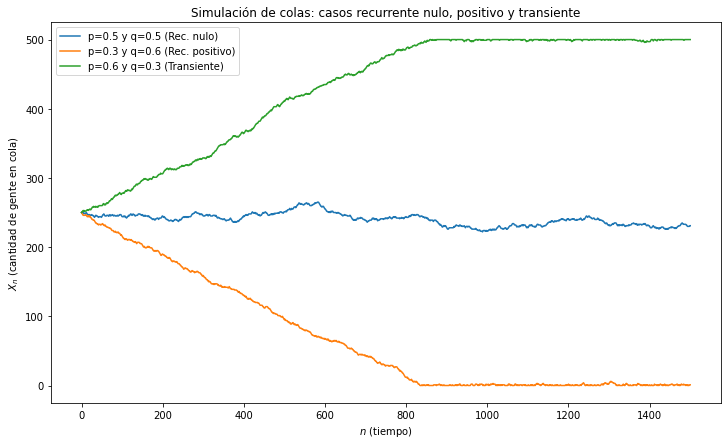

In [ ]:
# Parámetros
np.random.seed(42)
N = 500
P = np.zeros((N+1, N+1))
p = [0.5, 0.3, 0.6]  # Probabilidad de que llegue alguien a la cola.
q = [0.5, 0.6, 0.3]  # Probabilidad de que se atienda a alguien y se vaya.
# Coordenada 0: recurrente nulo, coordenada 1: caso recurrente positivo, coordenada 2: caso transiente.

# Matrices de transición
P_recnulo = np.zeros((N+1, N+1))
P_recpos = np.zeros((N+1, N+1))
P_trans = np.zeros((N+1, N+1))
for i in range(N+1):
    for j in range(N+1):
        if j == i+1 and i >= 1 and i <= N:
            P_recnulo[i,j] = p[0]*(1-q[0])
            P_recpos[i,j] = p[1]*(1-q[1])
            P_trans[i,j] = p[2]*(1-q[2])
        if j == i-1 and i >= 1 and i <= N:
            P_recnulo[i,j] = q[0]*(1-p[0])
            P_recpos[i,j] = q[1]*(1-p[1])
            P_trans[i,j] = q[2]*(1-p[2])
        if j == i and i >= 1 and i <= N-1:
            P_recnulo[i,j] = p[0]*q[0] + (1-p[0])*(1-q[0])
            P_recpos[i,j] = p[1]*q[1] + (1-p[1])*(1-q[1])
            P_trans[i,j] = p[2]*q[2] + (1-p[2])*(1-q[2])
        if i == N and j == N:
            P_recnulo[i,j] = 1 - q[0]*(1-p[0])
            P_recpos[i,j] = 1 - q[1]*(1-p[1])
            P_trans[i,j] = 1 - q[2]*(1-p[2])
        if i == j and j == 0:
            P_recnulo[i,j] = 1-p[0]
            P_recpos[i,j] = 1-p[1]
            P_trans[i,j] = 1-p[2]
        if i == 0 and j == 1:
            P_recnulo[i,j] = p[0]
            P_recpos[i,j] = p[1]
            P_trans[i,j] = p[2]

mu = np.zeros((1,N+1))
mu[0,N//2] = 1
n = 1500
X_recnulo = CM(mu, P_recnulo, n)
X_recpos = CM(mu, P_recpos, n)
X_trans = CM(mu, P_trans, n)

plt.figure(figsize=(12,7))
plt.plot(X_recnulo[0], label="p={p} y q={q} (Rec. nulo)".format(p=p[0], q=q[0]))
plt.plot(X_recpos[0], label="p={p} y q={q} (Rec. positivo)".format(p=p[1], q=q[1]))
plt.plot(X_trans[0], label="p={p} y q={q} (Transiente)".format(p=p[2], q=q[2]))
plt.title('Simulación de colas: casos recurrente nulo, positivo y transiente')
plt.legend()
plt.xlabel(r'$n$ (tiempo)')
plt.ylabel(r'$X_n$ (cantidad de gente en cola)')
plt.show()

Se observa que el caso recurrente nulo es el simil a una marcha aleatoria simple y simétrica, no se observa convergencia a distribución invariante ni divergencia. Por otro lado, en el caso recurrente positivo se observa una convergencia de la cadena a los primeros estados, para quedarse allí oscilando entre los estados 1 y 10 (esto se discute en detalle en la próxima sección con los histogramas de la distribución invariante asociada). Finalmente, en el caso transiente se observa una convergencia a los últimos estados en $E$. Esto se debe a que la cadena tiene espacio de estados finito, por lo que podríamos hablar de distribución invariante. Sin embargo, no es el caso general, pues tal y como se demuestra en el curso de Procesos de Markov, esta cadena diverge c.s. si $p>q$.

### P2.7)
#### Histogramas para la medida empírica y las medias ergódicas de $(X_n)$ en el caso recurrente positivo

Se fijan los parámetros $N=100$, $p=0.6$ y $q=0.8$ con lo que acorde a lo mostrado en P2.5), la cadena $(X_n)$ es recurrente positiva y por ende posee distribución invariante, que denotaremos $\pi$. A continuación, se implementan los métodos para obtener la medida empírica $\pi_{empirica}$ y las medias ergódicas $\pi_{ergodica}$, que representan estimaciones de la distribución invariante asociada. Para la estimación de la medida empírica se escoge simular $K=5000$ cadenas hasta tiempo $T=1000$ dada la capacidad de uno de los computadores del grupo. Para la estimación de las medias ergódicas se escoge simular una cadena hasta tiempo $T=1000000$.

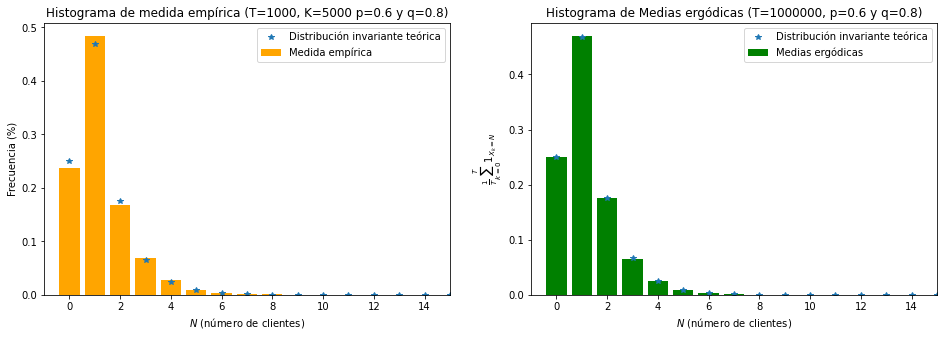

In [ ]:
# Parámetros para el caso recurrente positivo (p<q)
np.random.seed(42)
N = 100
p = 0.6
q = 0.8

# Matriz de transición
P = np.zeros((N+1, N+1))
for i in range(N+1):
    for j in range(N+1):
        if j == i+1 and i >= 1 and i <= N:
            P[i,j] = p*(1-q)
        if j == i-1 and i >= 1 and i <= N:
            P[i,j] = q*(1-p)
        if j == i and i >= 1 and i <= N-1:
            P[i,j] = p*q + (1-p)*(1-q)
        if i == N and j == N:
            P[i,j] = 1 - q*(1-p)
        if i == j and j == 0:
            P[i,j] = 1-p
        if i == 0 and j == 1:
            P[i,j] = p
            

# Distribución Invariante Teórica
pi = np.zeros(N+1)
pi[0] = (q-p)/q
for i in range(1, N+1):
    pi[i] = (q-p)/(q*(1-q)) * ((p*(1-q))/(q*(1-p)))**i    

mu = np.zeros((1,N+1))
mu[0, 9*N//10] = 1

# MEDIDA EMPÍRICA
K = 5000
T = 1000
XT = np.zeros(K)
for k in range(K):
    XT[k] = CM(mu, P, T)[0, T]
    
XT_frec = np.zeros(N+1)
for i in range(N+1):
    XT_frec[i] = np.count_nonzero(XT==i)
    
masa_XT_frec = sum(XT_frec)
medida_empirica = XT_frec / masa_XT_frec

# MEDIA ERGÓDICA
Terg = 1000000
Xerg = CM(mu, P, Terg)[0]
media_ergodica = np.zeros(N+1)
for i in range(N+1):
    media_ergodica[i] = np.count_nonzero(Xerg==i) / Terg
    
# Histogramas
plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.plot(np.arange(N+1), pi, '*', label='Distribución invariante teórica')
plt.bar(np.arange(N+1), medida_empirica, label='Medida empírica', color='orange')
plt.title('Histograma de medida empírica (T={tiempo}, K={k} p={p} y q={q})'.format(tiempo=T, k=K, p=p, q=q))
plt.xlabel(r'$N$ (número de clientes)')
plt.ylabel('Frecuencia (%)')
plt.legend()
plt.xlim(-1)
plt.xlim(right=15)
plt.subplot(122)
plt.plot(np.arange(N+1), pi, '*', label='Distribución invariante teórica')
plt.bar(np.arange(N+1), media_ergodica, label='Medias ergódicas', color='green')
plt.title('Histograma de Medias ergódicas (T={tiempo}, p={p} y q={q})'.format(tiempo=Terg, p=p, q=q))
plt.xlabel(r'$N$ (número de clientes)')
plt.ylabel(r'$\frac{1}{T}\sum_{k=0}^T1_{X_k=N}$')
plt.legend()
plt.xlim(-1)
plt.xlim(right=15)
plt.show()

Se observa en los histogramas que ambos métodos aproximan bastante bien a la distribución invariante. En virtud de los teoremas límites, la precisión es aún mayor si los parámetros son más grandes. En las próximas secciones se discute cómo mejora la aproximación de $\pi$ controlando $T$ y $K$. 

#### Comparación en variación total de estimación de medidas invariantes

Es de interés calcular ahora la distancia en variación total de la medida empírica $\pi_{empirica}$ y las medias ergódicas $\pi_{ergodica}$ con la distribución teórica $\pi$, es decir,

$
\begin{align*}
d(\pi,\pi_{empirica})=\sum_{i=0}^N|\pi_i-\pi_{empirica,i}| && d(\pi,\pi_{ergodica})=\sum_{i=0}^N|\pi_i-\pi_{ergodica,i}|
\end{align*}
$

Los resultados de este cálculo numérico se presentan en la celda siguiente. Es interesante observar como la media ergódica es bastante más precisa que la medida empírica, dada la diferencia en complejidad (que discutiremos en la próxima sección) que tienen ambos métodos.

In [ ]:
vartotal_empirica = sum(np.abs(pi - medida_empirica))
vartotal_ergodica = sum(np.abs(pi - media_ergodica))
print(r'Distancia en variación total de $\pi$ con $\pi_{empirica}$:')
print(vartotal_empirica)
print(r'Distancia en variación total de $\pi$ con $\pi_{ergodica}$:')
print(vartotal_ergodica)

Distancia en variación total de $\pi$ con $\pi_{empirica}$:
0.04179727626666428
Distancia en variación total de $\pi$ con $\pi_{ergodica}$:
0.004742592915044354


$
\begin{array}{|c|c|}
\hline
\text{Variación total} & \text{Medida empírica} & \text{Medias ergódicas} \\
\hline
d(\pi,\cdot)=\sum_{i=0}^N|\pi_i-(\cdot)| & 0.0417 & 0.0047 \\ 
\hline
\end{array}
$

Acorde a los parámetros fijados, la estimación de medias ergódicas es mejor que la medida empírica como estimador de la distribución invariante. Claramente eso no representa una palabra final con respecto a la precisión ni el costo de ambos métodos. Esto se discute en detalle en la sección siguiente.

#### Análisis de los métodos: rapidez de convergencia a $\pi$ en función de $T$ y $K$ y costos computacionales asociados

En la siguiente celda, se computa la distancia en variación total a $K=100$ (fijo) y tiempos $T$ variables en el rango $\{10^1,10^2,\dots,10^6\}$. Además, se calcula el tiempo que demoran ambos esquemas numéricos para estimar la distribución asociada. El análisis se realiza solo variando el tiempo $T$ ya que este parámetro influye en ambos métodos, a diferencia de $K$, que actúa solo sobre la estimación de la medida empírica.

Tiempo de celda [segundos]:  967.8300938606262


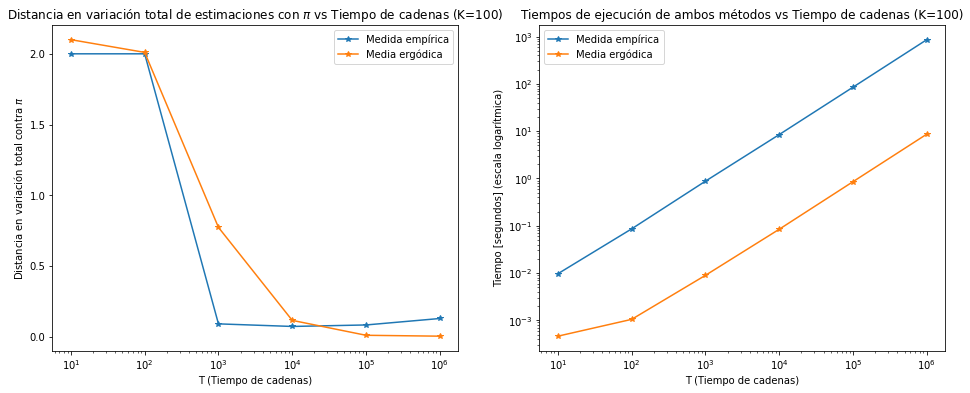

In [ ]:
# ADVERTENCIA: ESTA CELDA DEMORA MUCHO EN CORRER.
# UNA ESTIMACIÓN ES DE MEDIA HORA AL MENOS EN UNO
# DE LOS PC'S DEL GRUPO.

# PARA CONTROLAR ESTO SE PUEDE MODIFICAR EL RANGO
# DE TIEMPOS, PERO LO DEJAMOS ASÍ DADOS LOS RESULTADOS 
# OBTENIDOS. SE RECOMIENDA NO CORRERLA DE NUEVO, AL MENOS 
# NO CON LOS PARÁMETROS QUE VIENEN EN EL INFORME.

np.random.seed(42)
ti_celda = time.time()

# Parámetros
Tiempos = [10**k for k in range(1, 7)]
K = 100  # K fijo

vartotal_empiricaT = []
vartotal_ergodicaT = []
tiempos_vartotal_empiricaT = []
tiempos_vartotal_ergodicaT = []

for T in Tiempos:
    # MEDIDA EMPÍRICA
    ti = time.time()
    XT = np.zeros(K)
    for k in range(K):
        XT[k] = CM(mu, P, T)[0, T]

    XT_frec = np.zeros(N+1)
    for i in range(N+1):
        XT_frec[i] = np.count_nonzero(XT==i)

    masa_XT_frec = sum(XT_frec)
    medida_empirica = XT_frec / masa_XT_frec
    tf = time.time()
    tiempos_vartotal_empiricaT.append(tf-ti)
    vartotal_empiricaT.append(sum(np.abs(pi - medida_empirica)))
    
    # MEDIA ERGÓDICA
    ti = time.time()
    Xerg = CM(mu, P, T)[0]
    media_ergodica = np.zeros(N+1)
    for i in range(N+1):
        media_ergodica[i] = np.count_nonzero(Xerg==i) / T
    tf = time.time()
    tiempos_vartotal_ergodicaT.append(tf-ti)
    vartotal_ergodicaT.append(sum(np.abs(pi - media_ergodica)))

tf_celda = time.time()
tcelda = tf_celda-ti_celda
print('Tiempo de celda [segundos]: ',tcelda)

# Gráficos
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(Tiempos, vartotal_empiricaT, '-*', label='Medida empírica')
plt.plot(Tiempos, vartotal_ergodicaT, '-*', label='Media ergódica')
plt.xscale('log')
plt.title(r'Distancia en variación total de estimaciones con $\pi$ vs Tiempo de cadenas (K={k})'.format(k=K))
plt.xlabel('T (Tiempo de cadenas)')
plt.ylabel(r'Distancia en variación total contra $\pi$')
plt.legend()
plt.subplot(122)
plt.plot(Tiempos, tiempos_vartotal_empiricaT, '-*', label='Medida empírica')
plt.plot(Tiempos, tiempos_vartotal_ergodicaT, '-*', label='Media ergódica')
plt.xscale('log')
plt.yscale('log')
plt.title('Tiempos de ejecución de ambos métodos vs Tiempo de cadenas (K={k})'.format(k=K))
plt.xlabel('T (Tiempo de cadenas)')
plt.ylabel('Tiempo [segundos] (escala logarítmica)')
plt.legend()
plt.show()


Con respecto al método que mejor aproxima la medida invariante, hay dos observaciones principales. La primera es que a tiempos pequeños de hasta orden $10^3$ la medida empírica es mejor aproximando $\pi$, y lo hace en relativamente poco tiempo (del orden de 10 segundos). Por otra parte, la media ergódica aproxima de mejor manera $\pi$ a partir de tiempo de orden $10^4$, y lo especial es que lo hace a un costo computacional increíblemente menor a la estimación de la medida empírica. Concretamente, en el rango que las medias ergódicas aproximan mejor $\pi$ que la medida empírica, las medias ergódicas se estiman en cuestión de segundos, mientras que la medida empírica demora un tiempo de orden mayor a $10^2$ segundos, llegando a tomar decenas de minutos. El trade-off entonces es tiempo de ejecución vs precisión requerida. Ambos métodos presentan pros y contras, y determinar cuál usar en aplicaciones debe decidirse en razón de requerimientos predefinidos.

La diferencia en los tiempos de ejecución es claramente la cantidad de uniformes que se samplean. Para la estimación de la medida empírica, al implementar $K$ cadenas de Markov, se están sampleando $K\cdot T$ variables uniformes y este número es grande si $K$ y $T$ lo son. Por el contrario, para la estimación de medias ergódicas, solo se requiere una cadena de Markov sampleada a tiempo $T$, es decir, se requiere el sampleo de $T$ variables uniformes (número mucho menor a $K\cdot T$).

A continuación se analiza particularmente el método que estima la medida empírica controlando el parámetro $K$.

Tiempo de celda:  232.4185860157013


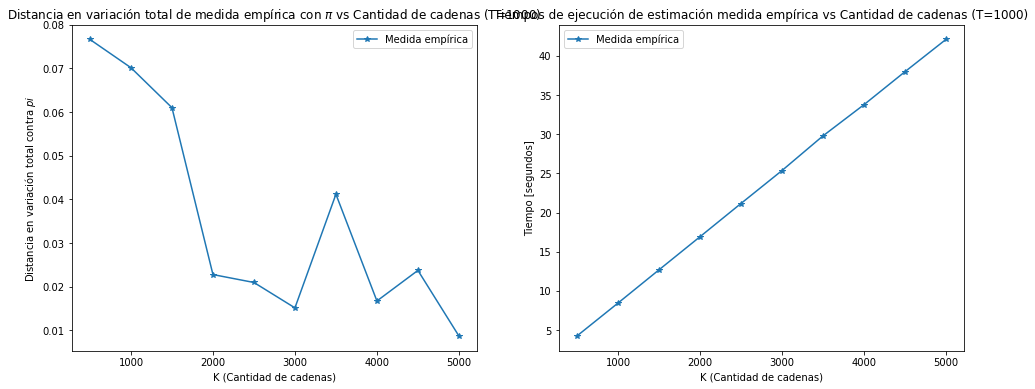

In [ ]:
# Parámetros
np.random.seed(42)
Cadenas = [500*k for k in range(1, 11)]
T = 1000

vartotal_empiricaK = []
tiempos_vartotal_empiricaK = []

ti_celda2 = time.time()
for K in Cadenas:
    ti = time.time()
    XT = np.zeros(K)
    for k in range(K):
        XT[k] = CM(mu, P, T)[0, T]

    XT_frec = np.zeros(N+1)
    for i in range(N+1):
        XT_frec[i] = np.count_nonzero(XT==i)

    masa_XT_frec = sum(XT_frec)
    medida_empirica = XT_frec / masa_XT_frec
    tf = time.time()
    tiempos_vartotal_empiricaK.append(tf-ti)
    vartotal_empiricaK.append(sum(np.abs(pi - medida_empirica)))

tf_celda2 = time.time()
tcelda2 = tf_celda2 - ti_celda2
print('Tiempo de celda: ', tcelda2)
    
# Gráficos
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(Cadenas, vartotal_empiricaK, '-*', label='Medida empírica')
plt.title(r'Distancia en variación total de medida empírica con $\pi$ vs Cantidad de cadenas (T={t})'.format(t=T))
plt.xlabel('K (Cantidad de cadenas)')
plt.ylabel(r'Distancia en variación total contra $pi$')
plt.legend()
plt.subplot(122)
plt.plot(Cadenas, tiempos_vartotal_empiricaK, '-*', label='Medida empírica')
plt.title('Tiempos de ejecución de estimación medida empírica vs Cantidad de cadenas (T={t})'.format(t=T))
plt.xlabel('K (Cantidad de cadenas)')
plt.ylabel('Tiempo [segundos]')
plt.legend()
plt.show()

Con respecto a la precisión de la medida empírica, se observa un comportamiento irregular en torno al rango de 2000-4500 réplicas de $(X_n)$. Esto representa una desventaja práctica para el método, pues no es posible decidir a priori una buena cantidad de réplicas para obtener precisión menor a 0.05, el análisis debe ir mucho más allá. Sin embargo, en suma, la tendencia es a la baja, es decir, en 5000 cadenas $(X_n)$ se alcanza la mejor precisión del rango. De esto surge otra desventaja para el método, pues el costo de simular más de 5000 cadenas es muy alto, lo que es explícito si se observa el gráfico de tiempos de ejecución del método para distintos $K$.

En conclusión, se afirma que la estimación de medias ergódicas es mucho más eficaz para aproximar $\pi$, dado que lo hace con menor costo computacional y a mayor precisión en tiempos $T$ grandes, a total diferencia de la medida empírica, cuyos resultados son más imprecisos y requieren mucho tiempo de ejecución.